In [57]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [58]:
df = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\AgeDataset-V1.csv')

In [59]:
df.head(2)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0


In [60]:
df.drop(['Id', 'Name','Short description', 'Manner of death'], axis=1, inplace=True)

In [61]:
df.head(2)

,Gender,Country,Occupation,Birth year,Death year,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Male,United Kingdom,Artist,1952,2001.0,49.0


In [62]:
df.isnull().sum()

Gender          133646
Country         335509
Occupation      206914
Birth year           0
Death year           1
Age of death         1
dtype: int64

In [63]:
df2 = df.dropna()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Gender        1089363 non-null  object 
 1   Country       887500 non-null   object 
 2   Occupation    1016095 non-null  object 
 3   Birth year    1223009 non-null  int64  
 4   Death year    1223008 non-null  float64
 5   Age of death  1223008 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.0+ MB


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735785 entries, 0 to 1223008
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Gender        735785 non-null  object 
 1   Country       735785 non-null  object 
 2   Occupation    735785 non-null  object 
 3   Birth year    735785 non-null  int64  
 4   Death year    735785 non-null  float64
 5   Age of death  735785 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 39.3+ MB


In [66]:
df = df2
del df2

In [67]:
df.head(2)

,Gender,Country,Occupation,Birth year,Death year,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Male,United Kingdom,Artist,1952,2001.0,49.0


## Dummies Occupation

In [68]:
occ_count = df['Occupation'].value_counts().reset_index()
occ_count

,Occupation,count
0,Artist,207657
1,Politician,153144
2,Athlete,92807
3,Researcher,64202
4,Military personnel,36313
...,...,...
7815,Designer; video game developer,1
7816,Daimyo; coin collecting; numismatist,1
7817,Animator; drawer,1
7818,Solicitor; philatelist; postage stamp designer,1


In [69]:
occ_count['count'].sum()

735785

In [70]:
low_occ_count = occ_count.loc[occ_count['count'] < 2000, 'count']
low_occ_count.sum()

82785

In [71]:
low_occ_count.shape

(7803,)

In [72]:
high_occ = occ_count.loc[occ_count['count'] > 2000, 'Occupation']
high_occ.values

array(['Artist', 'Politician', 'Athlete', 'Researcher',
       'Military personnel', 'Religious figure', 'Architect',
       'Businessperson', 'Journalist', 'Teacher', 'Engineer', 'Physician',
       'Judge', 'Lawyer', 'Jurist', 'Entrepreneur', 'Aristocrat'],
      dtype=object)

In [73]:
df = df.loc[df['Occupation'].isin(high_occ.values), :]
df.shape

(653000, 6)

In [74]:
df2 = pd.get_dummies(df, columns=['Occupation'],
                     drop_first=True)
df2.head(2)

,Gender,Country,Birth year,Death year,Age of death,Occupation_Aristocrat,Occupation_Artist,Occupation_Athlete,Occupation_Businessperson,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Judge,Occupation_Jurist,Occupation_Lawyer,Occupation_Military personnel,Occupation_Physician,Occupation_Politician,Occupation_Religious figure,Occupation_Researcher,Occupation_Teacher
0,Male,United States of America; Kingdom of Great Bri...,1732,1799.0,67.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,Male,United Kingdom,1952,2001.0,49.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
name_list = list(df2.loc[:,'Occupation_Aristocrat':'Occupation_Teacher'].columns.tolist())

for n in name_list:
    newn = n.replace('Occupation_', '')
    newn = newn.lower()
    df2[n] = df2[n].astype('int8')
    df2.rename(columns={n:newn}, inplace=True)

df2.head(2)

,Gender,Country,Birth year,Death year,Age of death,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,judge,jurist,lawyer,military personnel,physician,politician,religious figure,researcher,teacher
0,Male,United States of America; Kingdom of Great Bri...,1732,1799.0,67.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Male,United Kingdom,1952,2001.0,49.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dummy Country

In [76]:
coutry_c = df2['Country'].value_counts().reset_index()
coutry_c

,Country,count
0,United States of America,128852
1,Germany,70268
2,France,56599
3,United Kingdom; United Kingdom of Great Britai...,25693
4,Canada,19218
...,...,...
5078,Lithuania; Estonia; Soviet Union,1
5079,Song dynasty; Northern Song Dynasty; Later Lia...,1
5080,Hungary; Uruguay,1
5081,Northern Qi,1


In [77]:
coutry_c.loc[coutry_c['count'] < 7000, 'count'].sum()

163166

In [78]:
high_country = coutry_c.loc[coutry_c['count'] > 7000, 'Country']

In [79]:
high_country.shape

(21,)

In [80]:
df2 = df2.loc[df2['Country'].isin(high_country), :]
df2.shape

(489834, 21)

In [81]:
df2.drop('Death year', axis=1, inplace=True)

In [82]:
df2['Country'].value_counts()

Country
United States of America                                       128852
Germany                                                         70268
France                                                          56599
United Kingdom; United Kingdom of Great Britain and Ireland     25693
Canada                                                          19218
Spain                                                           19093
United Kingdom                                                  18244
Sweden                                                          16454
United Kingdom of Great Britain and Ireland                     15310
Italy; Kingdom of Italy                                         13545
Poland                                                          12614
Kingdom of the Netherlands                                      12115
Norway                                                          11987
Australia                                                       11781
Austria     

In [83]:
df2.loc[df2['Country'].isin(['United Kingdom; United Kingdom of Great Britain and Ireland',
                            'United Kingdom of Great Britain and Ireland',
                            'United Kingdom ']),
                            'Country'] = 'United Kingdom'

In [84]:
df2.loc[df2['Country'].isin(['Italy; Kingdom of Italy']),
                            'Country'] = 'Italy'

In [85]:
df2['Country'].value_counts()

Country
United States of America      128852
Germany                        70268
United Kingdom                 59247
France                         56599
Canada                         19218
Spain                          19093
Sweden                         16454
Italy                          13545
Poland                         12614
Kingdom of the Netherlands     12115
Norway                         11987
Australia                      11781
Austria                        11260
Belgium                         9050
Switzerland                     8161
Kingdom of Italy                7760
Japan                           7354
Finland                         7288
Denmark                         7188
Name: count, dtype: int64

In [86]:
df2 = pd.get_dummies(df2, columns=['Country'],
                     drop_first=True)

In [87]:
pd.set_option('display.max_columns', None)

In [88]:
df2.head(2)

,Gender,Birth year,Age of death,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,judge,jurist,lawyer,military personnel,physician,politician,religious figure,researcher,teacher,Country_Austria,Country_Belgium,Country_Canada,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Kingdom of Italy,Country_Kingdom of the Netherlands,Country_Norway,Country_Poland,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States of America
1,Male,1952,49.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,Male,1809,56.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [89]:
name_list = list(df2.loc[:,'Country_Austria':'Country_United States of America'].columns.tolist())

for n in name_list:
    newn = n.replace('Country_', '')
    newn = newn.lower()
    df2[n] = df2[n].astype('int8')
    df2.rename(columns={n:newn}, inplace=True)

df2.head(2)

,Gender,Birth year,Age of death,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,judge,jurist,lawyer,military personnel,physician,politician,religious figure,researcher,teacher,austria,belgium,canada,denmark,finland,france,germany,italy,japan,kingdom of italy,kingdom of the netherlands,norway,poland,spain,sweden,switzerland,united kingdom,united states of america
1,Male,1952,49.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Male,1809,56.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Gender

In [90]:
df2['Gender'].value_counts()

Gender
Male                          444108
Female                         45668
Transgender Female                26
Transgender Male                  18
Intersex                           3
Female; Male                       3
Non-Binary                         2
Transgender Female; Female         1
Transgender Female; Male           1
Intersex; Transgender Male         1
Transgender Male; Female           1
Transgender Male; Male             1
Female; Female                     1
Name: count, dtype: int64

In [91]:
df2 = df2.loc[df2['Gender'].isin(['Male', 'Female']), :]

In [92]:
df2['Gender'].value_counts()

Gender
Male      444108
Female     45668
Name: count, dtype: int64

In [93]:
df2['Gender'] = df2['Gender'].str.replace('Male', '1')
df2['Gender'] = df2['Gender'].str.replace('Female', '0')
df2['Gender'] = df2['Gender'].astype('int8')
df2.rename(columns={'Gender':'gender'}, inplace=True)
df2.head(2)

,gender,Birth year,Age of death,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,judge,jurist,lawyer,military personnel,physician,politician,religious figure,researcher,teacher,austria,belgium,canada,denmark,finland,france,germany,italy,japan,kingdom of italy,kingdom of the netherlands,norway,poland,spain,sweden,switzerland,united kingdom,united states of america
1,1,1952,49.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1809,56.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [94]:
df2.rename(columns={'Birth year':'birth year',
                    'Age of death':'death age'}, inplace=True)
df2.head(2)

,gender,birth year,death age,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,judge,jurist,lawyer,military personnel,physician,politician,religious figure,researcher,teacher,austria,belgium,canada,denmark,finland,france,germany,italy,japan,kingdom of italy,kingdom of the netherlands,norway,poland,spain,sweden,switzerland,united kingdom,united states of america
1,1,1952,49.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1809,56.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Delete outliers

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


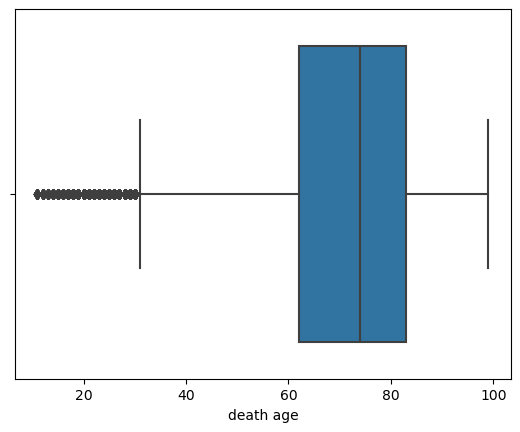

In [95]:
sns.boxplot(x='death age', data=df2)
plt.show()

In [96]:
q1,q2,q3 = df2['death age'].quantile([0.25, 0.5, 0.75]) 

In [97]:
l1 = q1 - 1.5*(q3 - q1)
L1 = q3 + 1.5*(q3 - q1)
print(f'l1: {l1}\nL1:{L1}')

l1: 30.5
L1:114.5


In [103]:
df2 = df2.loc[df2['death age']>l1, :]

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='birth year'>

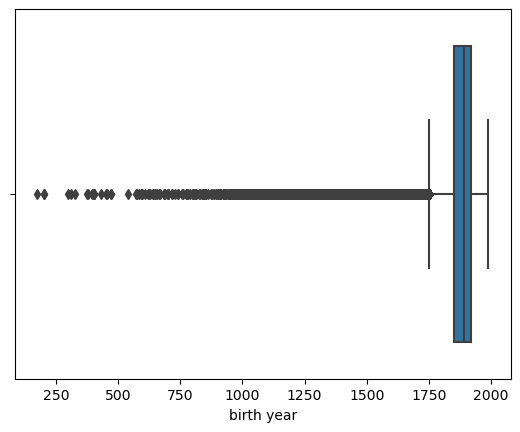

In [105]:
sns.boxplot(data=df2, x='birth year')

In [106]:
q1,q2,q3 = df2['birth year'].quantile([0.25, 0.5, 0.75])

l1 = q1 - 1.5*(q3 - q1)
L1 = q3 + 1.5*(q3 - q1)
print(f'l1: {l1}\nL1:{L1}')

df2 = df2.loc[df2['birth year']>l1, :]

df2.info()

l1: 1750.0
L1:2022.0
<class 'pandas.core.frame.DataFrame'>
Index: 454627 entries, 1 to 1223008
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gender                      454627 non-null  int8   
 1   birth year                  454627 non-null  int64  
 2   death age                   454627 non-null  float64
 3   aristocrat                  454627 non-null  int8   
 4   artist                      454627 non-null  int8   
 5   athlete                     454627 non-null  int8   
 6   businessperson              454627 non-null  int8   
 7   engineer                    454627 non-null  int8   
 8   entrepreneur                454627 non-null  int8   
 9   journalist                  454627 non-null  int8   
 10  judge                       454627 non-null  int8   
 11  jurist                      454627 non-null  int8   
 12  lawyer                      454627 non-null  int8   
 1

In [107]:
df2.to_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\Data\agedf_cleaned.csv')

# --------------------

# Start here

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r'C:\Users\matte\OneDrive\Desktop\GitHub\Data\agedf_cleaned.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,gender,birth year,death age,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,...,japan,kingdom of italy,kingdom of the netherlands,norway,poland,spain,sweden,switzerland,united kingdom,united states of america
454622,1,1896,68.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
454623,1,1936,76.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
454624,1,1930,50.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
454625,1,1857,67.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
454626,1,1938,79.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Death age - Birth year

In [3]:
df_mini = df.sample(n=40000, random_state=43)

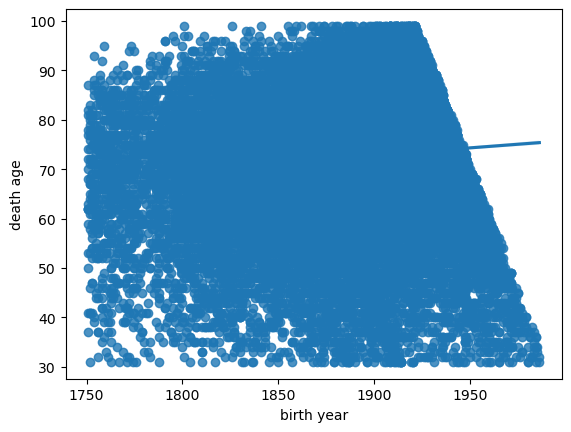

In [112]:
sns.regplot(x='birth year', y='death age', data=df_mini);

In [115]:
df[['birth year','death age']].corr()

,birth year,death age
birth year,1.000000,0.089143
death age,0.089143,1.000000


In [116]:
from scipy import stats 
pearson_coef,p_value=stats.pearsonr(df['death age'], df['birth year'])

print(pearson_coef)
print(p_value)

0.08914305957520928
0.0


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df_mini[['birth year']]
y_data = df_mini['death age']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.25, random_state=1)


In [120]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

rcross = cross_val_score(lr, x_data, y_data, cv=4)
rcross.mean()

0.008308706772096969

In [138]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

test_results = []
order = [1,2,3,4,5,6,7,8,9,10,11]

for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train).astype('float')
    x_test_pr = pr.fit_transform(x_test).astype('float')

    x_train_fin = scaler.fit_transform(x_train_pr)
    x_test_fin = scaler.transform(x_test_pr)

    lr.fit(x_train_fin, y_train)

    test_results.append(lr.score(x_test_fin, y_test))

Text(0, 0.5, 'R^2')

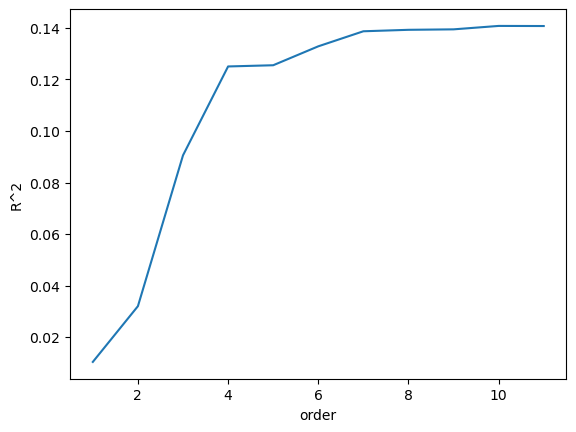

In [139]:
plt.plot(order, test_results)
plt.xlabel('order')
plt.ylabel('R^2')

In [143]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param1=[{'alpha':[0, 0.001,0.1,1, 10, 100, 1000, 10000]}]

rr = Ridge()

grid1 = GridSearchCV(rr, param1)

grid1.fit(x_train, y_train)

best_score = grid1.best_estimator_
best_score.score(x_test, y_test)

0.01036676880160925

In [144]:
best_score

Ridge(alpha=10000)

In [160]:
pr=PolynomialFeatures(degree=7)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

x_train_fin = scaler.fit_transform(x_train_pr)
x_test_fin = scaler.transform(x_test_pr)

grid1.fit(x_train_fin, y_train)

best_score = grid1.best_estimator_
best_score.score(x_test_fin, y_test)

0.13870283743208878

In [161]:
best_score

Ridge(alpha=0)

In [155]:
test_results[6]

0.1387029190779384

In [163]:
from sklearn.metrics import mean_squared_error

lr.fit(x_train_fin, y_train)

yhat = lr.predict(x_test_fin)

mean_squared_error(y_test, yhat)

173.09497694200203

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

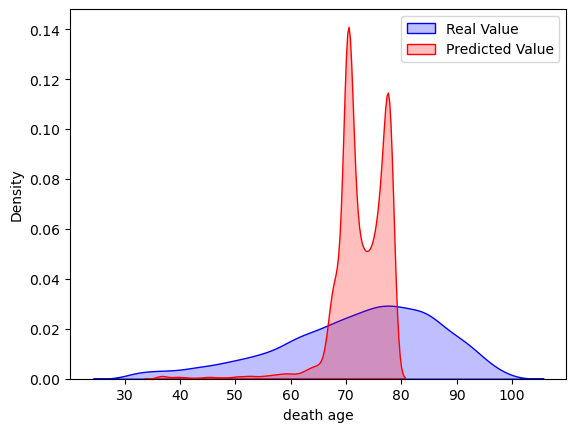

In [168]:
ax1 = sns.kdeplot(y_test, fill=True, color='b', label='Real Value')
sns.kdeplot(yhat, fill=True, color='r', label='Predicted Value', ax=ax1)

plt.legend();

In [ ]:
# The best model for death age and birth year is:
# degree = 7 — aplha = 0

## Job-death age

In [171]:
df_mini.head(1)

,gender,birth year,death age,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,judge,jurist,lawyer,military personnel,physician,politician,religious figure,researcher,teacher,austria,belgium,canada,denmark,finland,france,germany,italy,japan,kingdom of italy,kingdom of the netherlands,norway,poland,spain,sweden,switzerland,united kingdom,united states of america
246935,1,1877,75.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [174]:
corr_matrix = df_mini.loc[:,'death age':'teacher'].corr()
corr_matrix.loc['death age', :]

death age             1.000000
aristocrat           -0.014598
artist               -0.024364
athlete              -0.036826
businessperson        0.036261
engineer              0.016634
entrepreneur          0.006706
journalist           -0.007043
judge                 0.026590
jurist               -0.002704
lawyer                0.007754
military personnel   -0.049817
physician             0.005397
politician           -0.002288
religious figure      0.025512
researcher            0.057041
teacher               0.025895
Name: death age, dtype: float64

In [177]:
results_p_value = []

for i in df_mini.loc[:,'death age':'teacher'].columns.tolist():

    pearson_coef,p_value=stats.pearsonr(df2['death age'], df2[i])
    results_p_value.append(p_value)

results_p_value

[0.0,
 5.798378045081195e-14,
 3.0946542258637643e-50,
 9.025910229721832e-187,
 8.640952033213517e-100,
 7.626232520843023e-13,
 1.290139701539215e-07,
 2.208925202086058e-09,
 8.695840297318796e-55,
 0.28957389731550937,
 0.005771131579608162,
 1.5847325417246628e-165,
 0.00016316802272012558,
 0.006023597002581792,
 5.18147945459524e-35,
 0.0,
 9.954134265147782e-77]

In [179]:
z_data = df_mini.loc[:,'aristocrat':'teacher']

z_train, z_test, y_train, y_test = train_test_split(z_data, y_data, 
                                                    test_size=0.25, random_state=1)

rcross = cross_val_score(lr, z_data, y_data, cv=4)
rcross.mean()


0.010178615911856315

In [183]:
scaler = StandardScaler()

results_job_death = []

order = [1,2,3]

for i in order:
    pr = PolynomialFeatures(degree=i)

    z_train_pr = pr.fit_transform(z_train)
    z_test_pr = pr.fit_transform(z_test)

    z_train_fin = scaler.fit_transform(z_train_pr)
    z_test_fin = scaler.fit_transform(z_test_pr)

    lr.fit(z_train_fin, y_train)

    results_job_death.append(lr.score(z_test_fin, y_test))

    print(i, 'done!')

1 done!
2 done!
3 done!


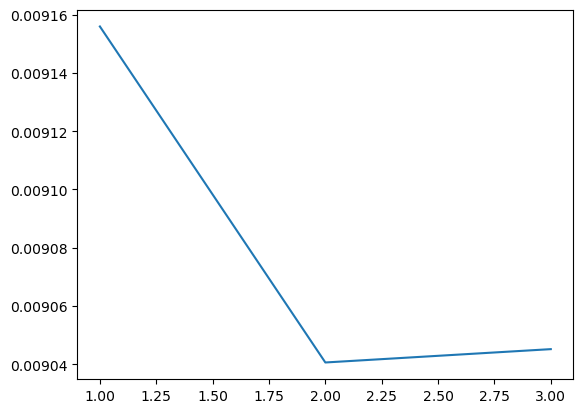

In [185]:
plt.plot(order, results_job_death);

In [187]:
param2 = [{'alpha':[0, 0.001, 0.01, 0.1]}]

grid2 = GridSearchCV(rr, param2)

grid2.fit(z_train_fin, y_train)

best_score = grid2.best_estimator_
best_score.score(z_test_fin, y_test)

0.009155891702448127

In [191]:
lr.fit(z_train, y_train)

yhat2 = lr.predict(z_test)

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

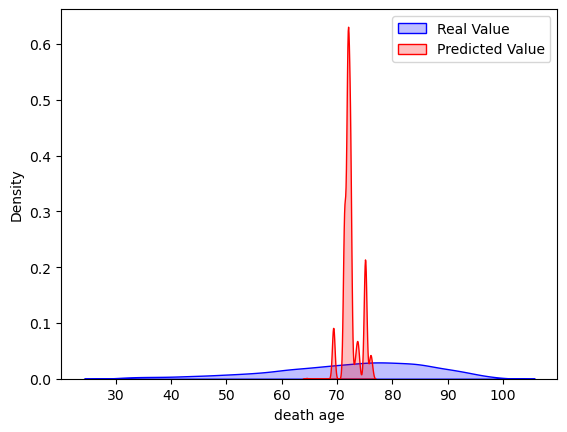

In [192]:
ax1 = sns.kdeplot(y_test, fill=True, color='b', label='Real Value')
sns.kdeplot(yhat2, fill=True, color='r', label='Predicted Value', ax=ax1)

plt.legend();

In [194]:
print('Job-death-----')
print('MSE:', mean_squared_error(y_test, yhat2))
print('R:', lr.score(z_test, y_test))

Job-death-----
MSE: 199.1142071845886
R: 0.009234765514546828


In [195]:
t_data = df_mini.drop('death age', axis=1)

t_train, t_test, y_train, y_test = train_test_split(t_data, y_data, 
                                                    test_size=0.25, random_state=1)

In [196]:
t_train.head(2)

,gender,birth year,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,judge,jurist,lawyer,military personnel,physician,politician,religious figure,researcher,teacher,austria,belgium,canada,denmark,finland,france,germany,italy,japan,kingdom of italy,kingdom of the netherlands,norway,poland,spain,sweden,switzerland,united kingdom,united states of america
291309,1,1818,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
325727,1,1890,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [202]:
lr.fit(t_train[['gender']], y_train)

yhat_gender = lr.predict(t_test[['gender']])

print('Gender-death-----')
print('P-value:', stats.pearsonr(df2['death age'], df2['gender'])[1])
print('MSE:', mean_squared_error(y_test, yhat_gender))
print('R:', lr.score(t_test[['gender']], y_test))

Gender-death-----
P-value: 0.0
MSE: 200.2000088045348
R: 0.0038319642187387704


In [206]:
lr.fit(t_train.loc[:,'austria':'united states of america'], y_train)

yhat_gender = lr.predict(t_test.loc[:,'austria':'united states of america'])

print('Gender-death-----')
print('P-value:', stats.pearsonr(df2['death age'], df2['germany'])[1])
print('MSE:', mean_squared_error(y_test, yhat_gender))
print('R:', lr.score(t_test.loc[:,'austria':'united states of america'], y_test))

Gender-death-----
P-value: 1.898040035816662e-07
MSE: 199.82498562090453
R: 0.005698028613242201


## All combined

In [4]:
df_mini.head(1)

,gender,birth year,death age,aristocrat,artist,athlete,businessperson,engineer,entrepreneur,journalist,...,japan,kingdom of italy,kingdom of the netherlands,norway,poland,spain,sweden,switzerland,united kingdom,united states of america
246935,1,1877,75.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
x_data = df_mini.drop('death age', axis=1).astype('float')
y_data = df_mini['death age'].astype('float')

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [9]:
scale = StandardScaler()
pr = PolynomialFeatures(degree=7)

x_train_sc = scale.fit_transform(x_train[['birth year']])
x_test_sc = scale.fit_transform(x_test[['birth year']])

x_train_by = pr.fit_transform(x_train_sc)
x_test_by = pr.fit_transform(x_test_sc)

In [14]:
x_train_fin = np.concatenate((x_train.drop('birth year', axis=1), x_train_by), axis=1)
x_test_fin = np.concatenate((x_test.drop('birth year', axis=1), x_test_by), axis=1)

In [15]:
lr = LinearRegression()

lr.fit(x_train_fin, y_train)

lr.score(x_test_fin, y_test)

0.15172680316172027

In [16]:
yhat_fin = lr.predict(x_test_fin)

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

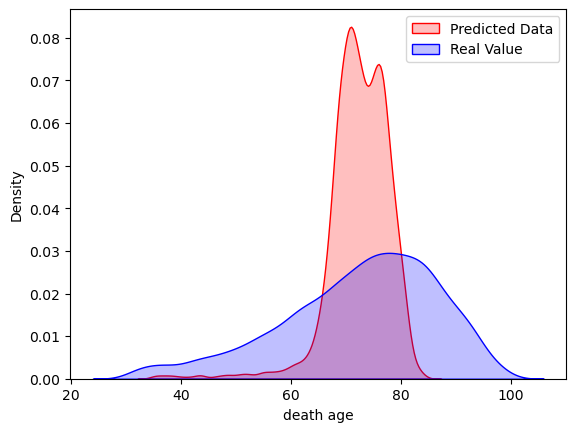

In [17]:
ax1 = sns.kdeplot(yhat_fin, fill=True, color='r', label='Predicted Data')
sns.kdeplot(y_test, fill=True, color='b', label='Real Value')

plt.legend();

In [18]:
mean_squared_error(y_test, yhat_fin)

170.4858609478109

In [43]:
df_mini.columns.tolist()

['gender',
 'birth year',
 'death age',
 'aristocrat',
 'artist',
 'athlete',
 'businessperson',
 'engineer',
 'entrepreneur',
 'journalist',
 'judge',
 'jurist',
 'lawyer',
 'military personnel',
 'physician',
 'politician',
 'religious figure',
 'researcher',
 'teacher',
 'austria',
 'belgium',
 'canada',
 'denmark',
 'finland',
 'france',
 'germany',
 'italy',
 'japan',
 'kingdom of italy',
 'kingdom of the netherlands',
 'norway',
 'poland',
 'spain',
 'sweden',
 'switzerland',
 'united kingdom',
 'united states of america']

In [45]:
#From 1850 to 1930

play = pd.DataFrame(columns=df_mini.columns)

gender='male'
byear=1930
job='military personnel'
location='japan'


if gender == 'male':
    play.loc[0, 'gender'] = 1
else:
    play.loc[0, 'gender'] = 0

play.loc[0, location] = 1
play.loc[0, job] = 1
play.loc[0, 'birth year'] = byear
play.fillna(0, inplace=True)
play_by = play[['birth year']]
play.drop(['birth year', 'death age'], axis=1, inplace=True)

play_by = scale.transform(play_by)
play_by = pr.transform(play_by)

play = np.concatenate((play, play_by), axis=1)

lr.predict(play)


array([72.9123023])

c:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='birth year'>

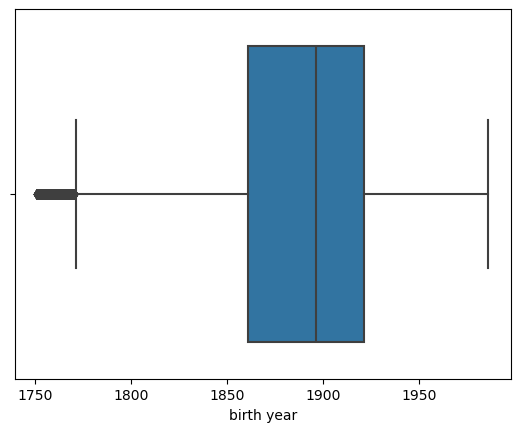

In [32]:
sns.boxplot(x=x_train['birth year'])